# CUSTOMER CHURN ANALYSIS
* Using Logistic Regression

# Business Understanding
* A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine being an analyst at this company and you have to find out who is leaving and why.

# Understanding The Data
The telecommunications dataset for predicting customer churn is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [ ]:
import urllib.request
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
filename = "Churndata.csv"
urllib.request.urlretrieve(url, filename)

In [8]:
df = pd.read_csv(r'Churndata.csv')
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [5]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

### Data pre-processing and selection
* Let's select some variables from the data that will be used for modeling

In [40]:
# change the target data type to be an integer, as it is a requirement by the skitlearn algorithm
cdf = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'internet', 'equip',   'callcard', 'wireless','churn']]
cdf['churn'] = cdf['churn'].astype('int')
cdf

C:\Users\Hello\AppData\Local\Temp\ipykernel_18780\1530375971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['churn'] = cdf['churn'].astype('int')


,tenure,age,address,income,ed,employ,internet,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,1.0,0.0,1.0,1.0,1


In [10]:
# define x, and y in order to convert the pandas dataframe to a numpy array for our dataset
x = np.asarray(cdf[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [12]:
y = np.asarray(cdf['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [13]:
# now normalize the dataset
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

### Train/Test dataset
* We split our dataset into train and test set

In [14]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 4)

print('train size: ', train_x.shape, train_y.shape)
print('test size: ', test_x.shape, test_y.shape)

train size:  (160, 9) (160,)
test size:  (40, 9) (40,)


### Modeling Using Logistic Regression

In [16]:
# C parameter indicates inverse of regularization strength. Smaller positive values specify stronger regularization
# Now let's fit our model with train set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(train_x, train_y)
lr

LogisticRegression(C=0.01, solver='liblinear')

### Prediction

In [17]:
# Now we can predict using our test set
prediction = lr.predict(test_x)
print('prediction: ', prediction[0:5])
print('test: ', test_y[0:5])

prediction:  [0 0 0 0 0]
test:  [0 0 1 0 1]


In [19]:
# we also provide the probability of the prediction
probability = lr.predict_proba(test_x)
probability

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

### Factors that determine Customer churn

In [41]:
# Description of Customers churned, i.e variables of class 1
cdf[cdf['churn'] == 1][['tenure', 'age', 'address', 'income', 'ed', 'employ', 'internet', 'equip', 'callcard', 'wireless', 'churn']].head().describe()

,tenure,age,address,income,ed,employ,internet,equip,callcard,wireless,churn
count,5.000000,5.00000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.0
mean,21.000000,29.40000,7.800000,77.000000,3.40000,2.20000,0.200000,0.400000,0.400000,0.400000,1.0
std,17.248188,5.94138,6.180615,66.177791,1.81659,3.03315,0.447214,0.547723,0.547723,0.547723,0.0
min,4.000000,22.00000,2.000000,19.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,11.000000,24.00000,2.000000,33.000000,2.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
50%,12.000000,33.00000,7.000000,36.000000,4.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
75%,33.000000,33.00000,12.000000,136.000000,5.00000,5.00000,0.000000,1.000000,1.000000,1.000000,1.0
max,45.000000,35.00000,16.000000,161.000000,5.00000,6.00000,1.000000,1.000000,1.000000,1.000000,1.0


In [29]:
# the shape of class 1
cdf[cdf['churn'] == 1][['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']].shape

(58, 10)

In [42]:
# Description of Customers that remained with the company, i.e variables of class 0
cdf[cdf['churn'] == 0][['tenure', 'age', 'address', 'income', 'ed', 'internet', 'employ', 'equip', 'callcard', 'wireless', 'churn']].head().describe()

,tenure,age,address,income,ed,internet,employ,equip,callcard,wireless,churn
count,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,35.600000,38.40000,10.40000,68.600000,1.600000,0.400000,11.800000,0.400000,0.800000,0.400000,0.0
std,22.766203,8.38451,4.97996,36.452709,0.547723,0.547723,8.258329,0.547723,0.447214,0.547723,0.0
min,7.000000,30.00000,5.00000,30.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,23.000000,35.00000,7.00000,37.000000,1.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.0
50%,38.000000,35.00000,9.00000,76.000000,2.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.0
75%,42.000000,40.00000,14.00000,80.000000,2.000000,1.000000,15.000000,1.000000,1.000000,1.000000,0.0
max,68.000000,52.00000,17.00000,120.000000,2.000000,1.000000,24.000000,1.000000,1.000000,1.000000,0.0


In [30]:
# the shape of class 0
cdf[cdf['churn'] == 0][['tenure', 'age', 'address', 'inco**me', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']].shape

(142, 10)

## Observation:
* From the numerical description of the selected features for modeling in this dataset, Age of the customers stand out the most as the determining factor for customer churn in the company. For class of 1 or churned customers, the mean age is 29.4 whilst that of 0 or retained customers is 38.4; which is almost a decade gap. The upper and lower percentile(75%) of class 1 is 33 and 24 respectively whilst that of 0 is 40 and 35. Maximum and minimum age of class 1 is 35 and 22 respectively whilst class 0 is 52 and 35. This therefore tells us that customers below 35 years of age are more prone to leave the company than older ones.
* There is also a low record of internet users in class 1 as shown in the percentiles equaling 0 which means that most in this category did not sign up for the service, in contrast to the retained customers who majorly signed up for the internet service as it's 75th percentile shows. This gives apparent reason for the younger customers in class 1 to leave for cable competitors. 
* Out of 200 customers from this historical data, 58 were churned which is about 29% churn rate.And those churned seemed to have earned slightly higher than those who are retained, with a mean income for churned at USD77 against the retained at USD68.6

## Recommendation:
* Since the company is a landline company, the target customers ought to be companies, organizations etc. as people these days tend to use the mobile phone. Hence marketing strategies should be focused towards this niche.
* To maintain current customers who have signed up for the internet service, it's important to maintain seamless connection in order to increase customer satisfaction in this aspect.
* In terms of individual customers, focus groups are those of older age bracket, preferably greater than 40 years of age.

### Evaluation of the test dataset


In [18]:
# the jaccard index for accuracy evaluation.
from sklearn.metrics import jaccard_score
print('accuracy score: ', jaccard_score(test_y, prediction, pos_label=0))

accuracy score:  0.5625


In [19]:
# confusion matrix as another source of evaluation for our data
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_y, prediction, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


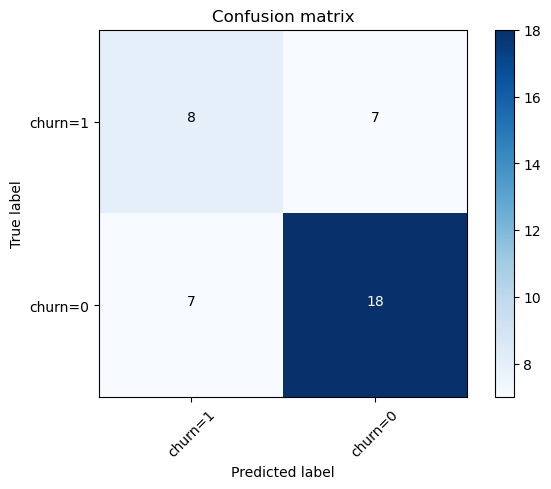

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, prediction, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### Deductions:
The first row is for customers whose actual churn value in the test set is 1. As you can calculate, out of 40 customers, the churn value of 15 of them is 1. Out of these 15 cases, the classifier correctly predicted 8 of them as 1, and 7 of them as 0.

This means, for 8 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 7 customers was class 1, the classifier predicted those as class 0. We can consider it as the error of the model for first row.

Lets look at the second row for customers with churn value 0. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 18 of them as 0, and 7 of them wrongly as 1, which is not that bad. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.

In [39]:
print (classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



* Precision is a measure of the accuracy provided that a class label has been predicted.

* Recall is the true positive rate. 


* F1 score: The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. Finally, the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.65 in this case.

